# LAB 2. APPLICATIONS OF EIGENVECTORS
## **Task 1**. Computing Eigenvalues and Eigenvectors of a Matrix
Let A be matrix:
$$
A =
\begin{pmatrix}
4 & 1 \\
2 & 3
\end{pmatrix}
$$

Here I compute its eigenvalues λ and eigenvectors ∨ using *np.linalg.eig* and check if the equation A * ∨ = λ * ∨ is correct.

In [206]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [207]:
matrix = np.matrix([[4, 1],
                    [2, 3]])

eigenvalues, eigenvectors = np.linalg.eig(matrix)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)
eigenvalues, eigenvectors

for i in range(len(eigenvalues)):
  if np.allclose(matrix * eigenvectors[:, i], eigenvalues[i] * eigenvectors[:, i]):
    print(f"The equality A*v = lambda*v is correct for eigenvector ", eigenvectors[i], "and eigenvalue", eigenvalues[i])
  else:
    print(f"The equality A*v = lambda*v is incorrect for eigenvector ", eigenvectors[i], "and eigenvalue", eigenvalues[i])

The equality A*v = lambda*v is correct for eigenvector  [[ 0.70710678 -0.4472136 ]] and eigenvalue 5.0
The equality A*v = lambda*v is correct for eigenvector  [[0.70710678 0.89442719]] and eigenvalue 2.0


## **Task 2**. Implementation of Image Dimensionality Reduction Using Principal Component Analysis (PCA: Image Compression)

First I initialize a picture. This is a photo I made in the Carpathians two weeks ago :)

In [208]:
image_raw = imread("DSCF3144.jpg")
print(image_raw.shape)

(3512, 6240, 3)


In [209]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)
image_bw = image_sum/image_sum.max()
print(image_bw.max())

(3512, 6240)
1.0


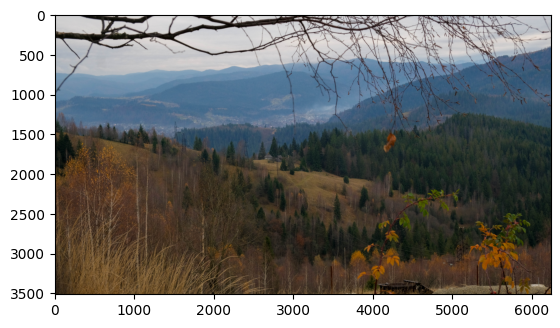

In [210]:
plt.imshow(image_raw)

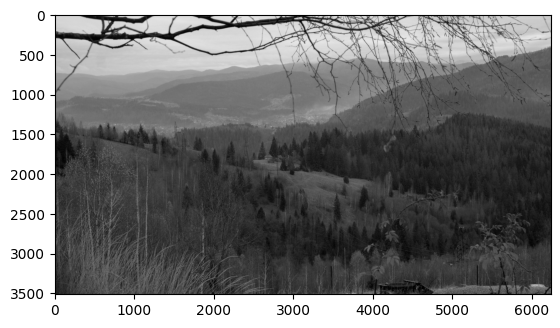

In [211]:
plt.imshow(image_bw, cmap='gray')

Here I am finding the number of components needed for 95% variance using cumulative variance. For this picture it is 53.

In [212]:
pca = PCA()
pca.fit(image_bw)

PCA()

In [213]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [214]:
num_components = np.where(cumulative_variance > 0.95)[0][0] + 1
num_components

np.int64(53)

Double-checking that 53 components produce 95% variance:

In [215]:
pca = PCA(53)
reduced_image = np.matrix(pca.fit_transform(image_bw))
reconstructed_image = pca.inverse_transform(reduced_image)
sum(pca.explained_variance_ratio_)

np.float64(0.9501747982153231)

Here I define the function that will compress the image using PCA. I use *pca()* function from the *sklearn* library.

Next I compress the image to 95% of variance.

In [216]:
def compress_image(image, num_components):
  pca = PCA(num_components)
  reduced_image = np.matrix(pca.fit_transform(image))
  reconstructed_image = pca.inverse_transform(reduced_image)
  return reconstructed_image, sum(pca.explained_variance_ratio_)

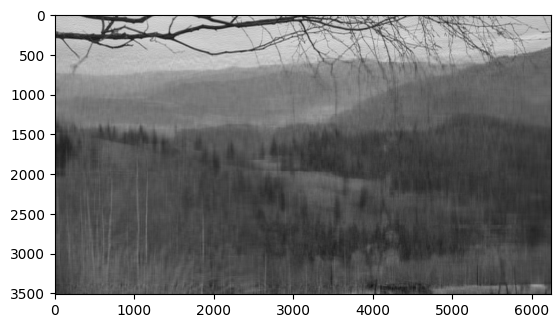

In [217]:
reconstructed_image = compress_image(image_bw, 53)[0]
plt.imshow(reconstructed_image, cmap='gray')

Here I am exploring how different numbers of components will affect the image.

I found out that the minimal variance is 0.71, so I started with it.

In [218]:
min(cumulative_variance)

np.float64(0.7114689920506981)

In [219]:
num_components1 = np.where(cumulative_variance > 0.7)[0][0] + 1
num_components2 = np.where(cumulative_variance > 0.75)[0][0] + 1
num_components3 = np.where(cumulative_variance > 0.80)[0][0] + 1
num_components4 = np.where(cumulative_variance > 0.85)[0][0] + 1
num_components5 = np.where(cumulative_variance > 0.90)[0][0] + 1
num_components6 = np.where(cumulative_variance > 0.99)[0][0] + 1

Text(0.5, 1.0, '299 components, variance of 0.99')

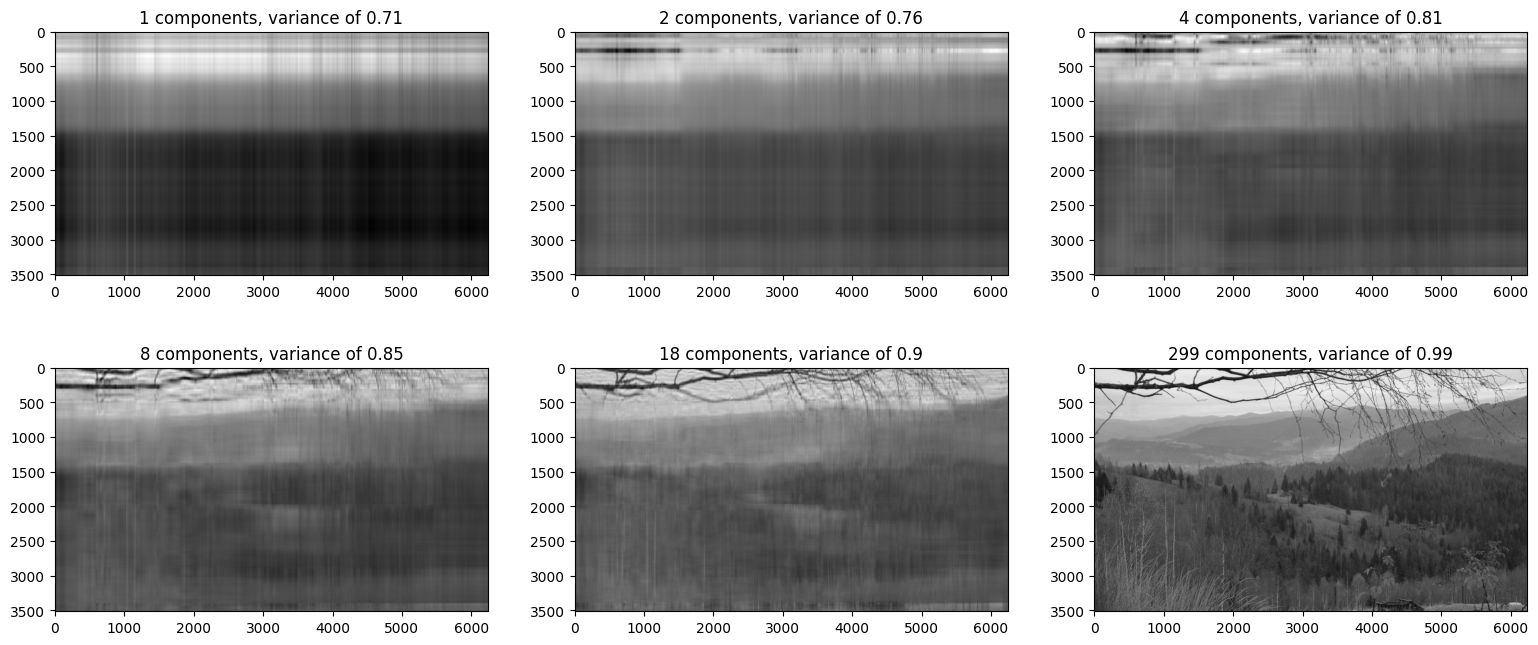

In [220]:
fig, axes = plt.subplots(2, 3, figsize=(19, 8))

axes[0, 0].imshow(compress_image(image_bw, num_components1)[0], cmap='gray')
axes[0, 0].set_title(f"{num_components1} components, variance of {round(compress_image(image_bw, num_components1)[1], 2)}")

axes[0, 1].imshow(compress_image(image_bw, num_components2)[0], cmap='gray')
axes[0, 1].set_title(f"{num_components2} components, variance of {round(compress_image(image_bw, num_components2)[1], 2)}")

axes[0, 2].imshow(compress_image(image_bw, num_components3)[0], cmap='gray')
axes[0, 2].set_title(f"{num_components3} components, variance of {round(compress_image(image_bw, num_components3)[1], 2)}")

axes[1, 0].imshow(compress_image(image_bw, num_components4)[0], cmap='gray')
axes[1, 0].set_title(f"{num_components4} components, variance of {round(compress_image(image_bw, num_components4)[1], 2)}")

axes[1, 1].imshow(compress_image(image_bw, num_components5)[0], cmap='gray')
axes[1, 1].set_title(f"{num_components5} components, variance of {round(compress_image(image_bw, num_components5)[1], 2)}")

axes[1, 2].imshow(compress_image(image_bw, num_components6)[0], cmap='gray')
axes[1, 2].set_title(f"{num_components6} components, variance of {round(compress_image(image_bw, num_components6)[1], 2)}")

My image ended up being way too blurred, so I tried another picture. This is also a photo of mine, but from the Volodymyrska Hirka, taken in the middle of October.

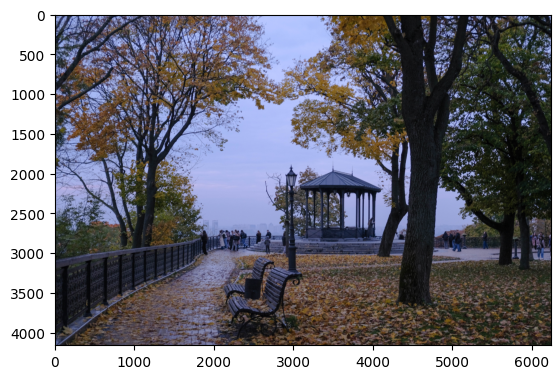

In [221]:
image_raw1 = imread("DSCF2189.jpg")
image_bw1 = image_raw1.sum(axis=2)/(image_raw1.sum(axis=2).max())

plt.imshow(image_raw1)

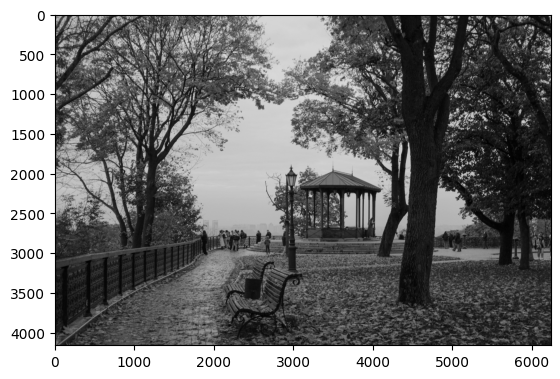

In [222]:
plt.imshow(image_bw1, cmap='gray')

I used the same values and the pictures on each stage looked much sharper. I believe it has something to do with the contrast.

Text(0.5, 1.0, '299 components, variance of 0.99')

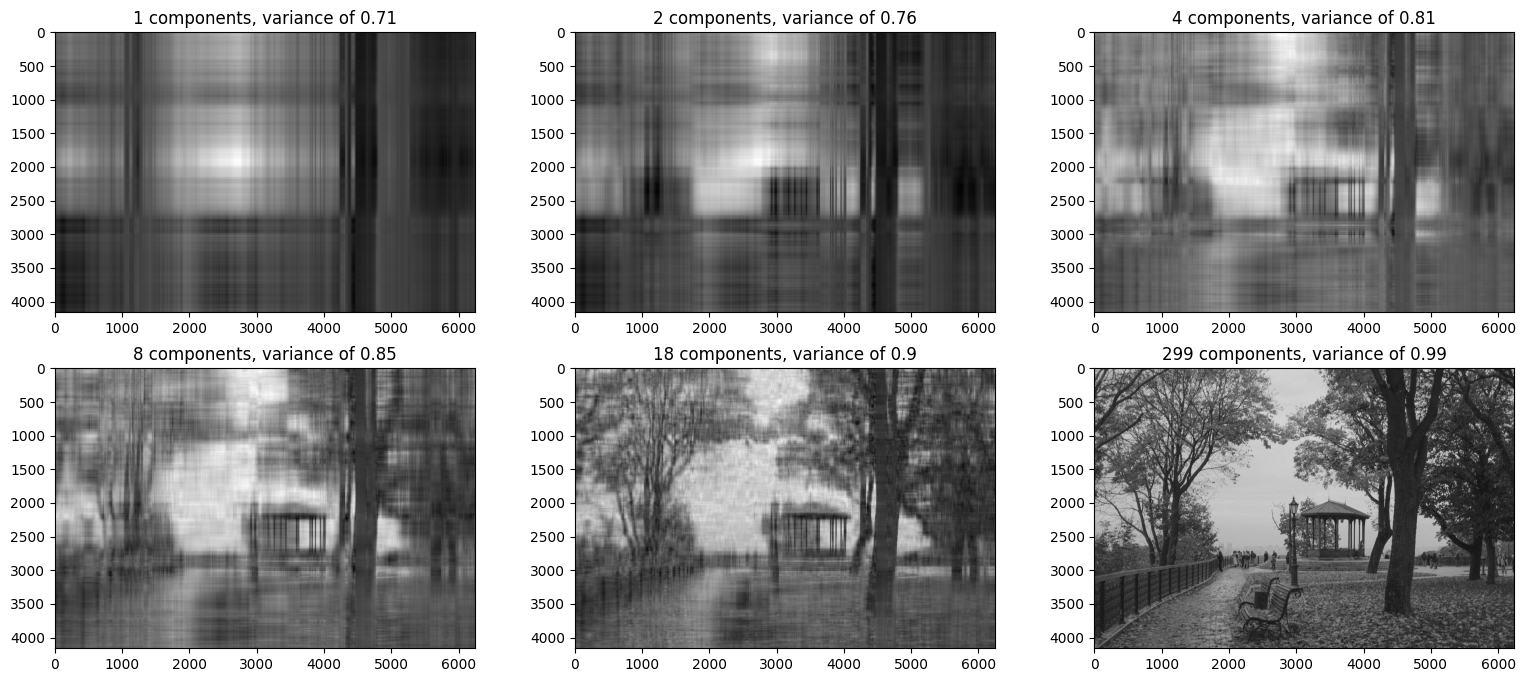

In [223]:
fig, axes = plt.subplots(2, 3, figsize=(19, 8))

axes[0, 0].imshow(compress_image(image_bw1, num_components1)[0], cmap='gray')
axes[0, 0].set_title(f"{num_components1} components, variance of {round(compress_image(image_bw, num_components1)[1], 2)}")

axes[0, 1].imshow(compress_image(image_bw1, num_components2)[0], cmap='gray')
axes[0, 1].set_title(f"{num_components2} components, variance of {round(compress_image(image_bw, num_components2)[1], 2)}")

axes[0, 2].imshow(compress_image(image_bw1, num_components3)[0], cmap='gray')
axes[0, 2].set_title(f"{num_components3} components, variance of {round(compress_image(image_bw, num_components3)[1], 2)}")

axes[1, 0].imshow(compress_image(image_bw1, num_components4)[0], cmap='gray')
axes[1, 0].set_title(f"{num_components4} components, variance of {round(compress_image(image_bw, num_components4)[1], 2)}")

axes[1, 1].imshow(compress_image(image_bw1, num_components5)[0], cmap='gray')
axes[1, 1].set_title(f"{num_components5} components, variance of {round(compress_image(image_bw, num_components5)[1], 2)}")

axes[1, 2].imshow(compress_image(image_bw1, num_components6)[0], cmap='gray')
axes[1, 2].set_title(f"{num_components6} components, variance of {round(compress_image(image_bw, num_components6)[1], 2)}")

## **Task 3.** Using Diagonalization, Eigenvalues and Eigenvectors in Cryptography

In this task I encountered an issue :(

Due to several possible issues, my code did not work properly.

### The issues are:
1. Randomly generated matrix is not strictly diagonalizable
2. The error produced by numerous dot products and inverses becomes too big and distort the decoded word

---

For a random matrix its diagonalization is not equal to the original matrix:

In [225]:
key_matrix = np.random.randint(0, 256, (5, 5))

eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)
diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))

In [226]:
key_matrix

array([[ 77, 214,  21, 149, 164],
       [ 65, 237, 204,   2, 111],
       [ 74, 160, 191, 195, 188],
       [ 25, 153, 195, 125, 123],
       [239,  73,  53, 234,  86]])

In [227]:
diagonalized_key_matrix

array([[ -55.38785869,  106.08440263,  328.91974402, -136.61214131,
         139.50240156],
       [ -16.8518849 ,  138.2079229 ,  365.14746113, -135.1481151 ,
          97.68457249],
       [ -94.21663313,   72.89739668,  537.10725996, -121.28336687,
         148.2742435 ],
       [ -81.37951237,   50.13768805,  435.63889851,  -94.62048763,
         105.15499975],
       [ 105.34828722,  167.22114412,  378.47950267, -137.34828722,
          51.12837529]])

In [228]:
np.array_equal(key_matrix, diagonalized_key_matrix)

False

So I solved those issues in two ways:
## 1. Using custom diagonazible matrix
Here i use matrix $$
key =
\begin{pmatrix}
2 & 0 & 0 \\
1 & 2 & 1 \\
-1 & 0 & 1
\end{pmatrix} .
$$

It is diagonalizable, so the code runs with no errors. However, due to numeric error, the letters are not decoded properly.

---

Checking if diagonalization is equal to the original matrix:

In [229]:
key_matrix = np.array([[2, 0, 0],
                       [1, 2, 1],
                       [-1, 0, 1]])

In [230]:
eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)
diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))

In [231]:
diagonalized_key_matrix

array([[ 2.,  0.,  0.],
       [ 1.,  2.,  1.],
       [-1.,  0.,  1.]])

In [232]:
np.array_equal(key_matrix, diagonalized_key_matrix)

True

It is! So we can use it.

In [233]:
def encrypt_message(message, key_matrix):
  message_vector = np.array([ord(char) for char in message])
  eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
  eigenvalues = np.real(eigenvalues)
  eigenvectors = np.real(eigenvectors)
  diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
  encrypted_vector = np.dot(diagonalized_key_matrix, message_vector)
  return encrypted_vector

In [234]:
def decrypt_message(encrypted_vector, key_matrix):
  eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
  eigenvalues = np.real(eigenvalues)
  eigenvectors = np.real(eigenvectors)
  inverse_diagonalized_key_matrix = np.dot(np.dot(np.linalg.inv(eigenvectors), np.diag(1/eigenvalues)), eigenvectors)
  decrypted_vector = np.dot(inverse_diagonalized_key_matrix, encrypted_vector)
  message_vector = np.array([chr(int(round(char))) for char in decrypted_vector])
  return message_vector

In [235]:
message = "dot"
key_matrix = np.array([[2, 0, 0],
                       [1, 2, 1],
                       [-1, 0, 1]])

In [236]:
encrypted = encrypt_message(message, key_matrix)
encrypted

array([200., 438.,  16.])

In [237]:
decrypted = decrypt_message(encrypted, key_matrix)
decrypted

array(['-', 'Û', '\x08'], dtype='<U1')

## 2. Using *inv* function

If I use built-in *numpy.inv* function, the numeric error is minimized and the code runs even with generated matrices. The message is decoded correctly, however, inverse diagolization is not used.

In [238]:
def encrypt_message(message, key_matrix):
  message_vector = np.array([ord(char) for char in message])
  eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
  eigenvalues = np.real(eigenvalues)
  eigenvectors = np.real(eigenvectors)
  diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
  encrypted_vector = np.dot(diagonalized_key_matrix, message_vector)
  return diagonalized_key_matrix, encrypted_vector

In [239]:
def decrypt_message(encrypted_vector, diagonalized_key_matrix):
  inverse_diagonalized_key_matrix = np.linalg.inv(diagonalized_key_matrix)
  decrypted_vector = np.dot(inverse_diagonalized_key_matrix, encrypted_vector)
  message_vector = ''.join(np.array([chr(int(round(char))) for char in decrypted_vector]))
  return message_vector

In [251]:
message = "Hello, world!"
key_matrix = np.random.randint(0, 256, (len(message), len(message)))

In [252]:
encrypted = encrypt_message(message, key_matrix)
encrypted[1]

array([-275897.81675627, -227603.54489803, -142081.53412466,
        -88710.61704154, -189276.3562882 , -156283.04289689,
        -85723.41770947, -164469.34524709, -135378.1545342 ,
        -93841.6445693 , -149822.42810525, -124689.59091481,
       -168368.42069024])

In [253]:
decrypted = decrypt_message(encrypted[1], encrypted[0])
decrypted

'Hello, world!'